In [1]:
import pandas as pd
import numpy as np
import wrangle as w
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')
sns.set_palette("colorblind")
import sklearn.preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression

from scipy import stats


In [2]:
train, validate, test = w.prep_zillow()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (61,62,71,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
train.shape, validate.shape, test.shape

((31087, 20), (13323, 20), (11103, 20))

In [4]:
def distros(df):
    for col in (df).columns:
        plt.hist((df)[col])
        plt.title(col)
        plt.show()

In [5]:
import pandas as pd
import numpy as np
import wrangle as w
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')
sns.set_palette("colorblind")
import sklearn.preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression

from scipy import stats




def distros(df):
    for col in (df).columns:
        plt.hist((df)[col])
        plt.title(col)
        plt.show()
        

def explore_univariate(df, variable):
    '''
    explore_univariate will take in a dataframe, and one feature or variable. It graphs a box plot and a distribution 
    of the single variable.
    '''
    #set figure size, font for axis ticks
    plt.figure(figsize=(30,10))
    sns.set(font_scale = 2)
    
    # boxplot and stipplot
    plt.subplot(1, 2, 1)
    ax1= sns.boxplot(x=variable, data=df)
    sns.stripplot(x=variable, data=df)
    plt.xlabel('')
    plt.title('Box Plot', fontsize=30)
    

    
    
    
    # distribution
    plt.subplot(1, 2, 2)
    ax2= sns.histplot(data=df, x=variable, element='step', kde=True)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Distribution', fontsize=30)
    

    #title
    plt.suptitle(f'{variable}', fontsize = 45)
    plt.tight_layout()
    plt.show()


def logerror_uni(df, variable):
    '''
    explore_univariate will take in a dataframe, and one feature or variable. It graphs a box plot and a distribution 
    of the single variable.
    '''
    #set figure size, font for axis ticks
    plt.figure(figsize=(30,10))
    sns.set(font_scale = 2)
    
    # boxplot and stipplot
    plt.figure(figsize=(10,15))
    sns.relplot(variable, train.logerror, data =df)
    plt.title(f'Log Error and {variable}')

    plt.show()
    

def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    '''Takes in df and scales the columns inputed and concats them to the dataframe '''    
    # new column names
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    
    # Fit the scaler on the train
    scaler.fit(train[columns_to_scale])
    
    # transform train validate and test
    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    
    
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

def inertia_graph(X):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
def create_cluster(train, X, k, cluster_name):
    ''' Takes in df, X (dataframe with variables you want to cluster on), k number of clusters,
    and the name you want to name the column (enter column as string)
    It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    the scaler and kmeans object and unscaled centroids as a dataframe
    note: train_scaled enter the scaled train dataframe
    for X enter the dataframe of the two features for your cluster
    for k enter number of features
    for cluster_name enter name of the cluster column name you want as a string
    '''
    scaler = MinMaxScaler(copy=True).fit(X)
    X = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    kmeans.predict(X)
    train[cluster_name] = kmeans.predict(X)
    # train_scaled[cluster_name] = 'cluster_' + train_scaled[cluster_name].astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
    return train, X, scaler, kmeans, centroids

def plot_clusters(x ,y, cluster_col_name, df , kmeans, scaler, centroids):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    # set palette to zillow colors
    zpalette = ['#1277e1', '#f3ad35', '#0b449c', '#5289e4', '#c3eafb']

    # set figsize
    plt.figure(figsize=(10, 6))
    
    # scatterplot the clusters 
    sns.scatterplot(x = x, y = y, data = df, hue = cluster_col_name, cmap = zpalette)
    
    # plot the centroids as Xs
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.60, s=500, c='black', marker = 'x')

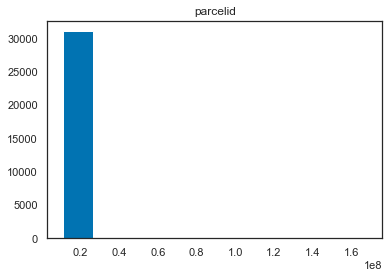

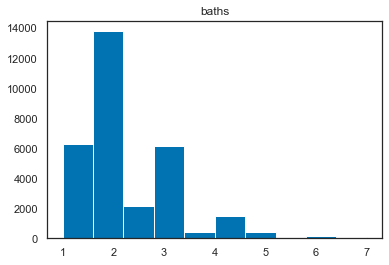

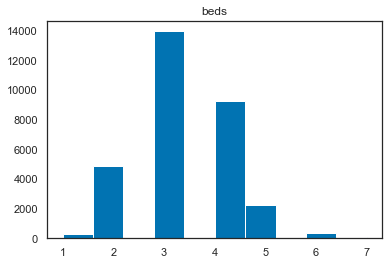

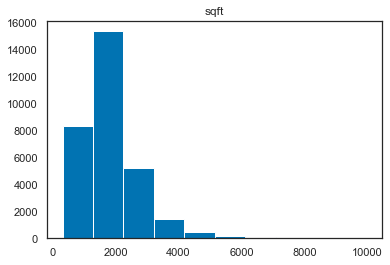

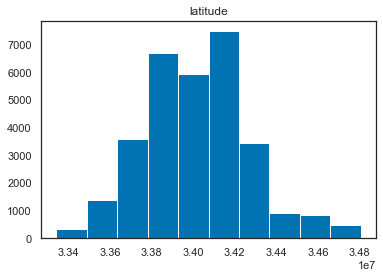

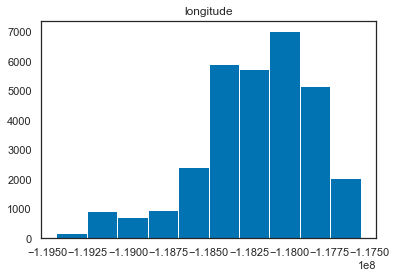

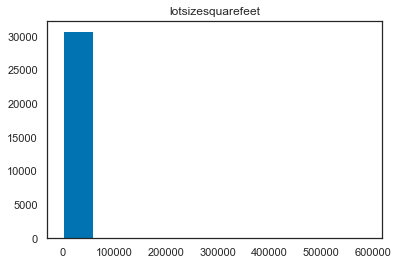

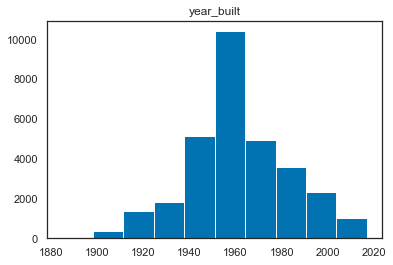

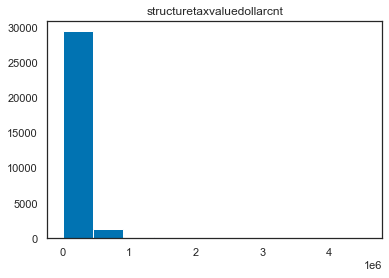

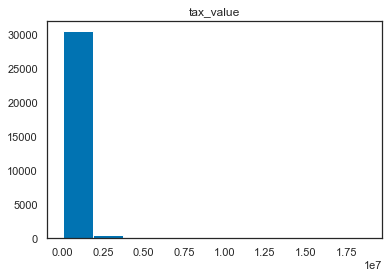

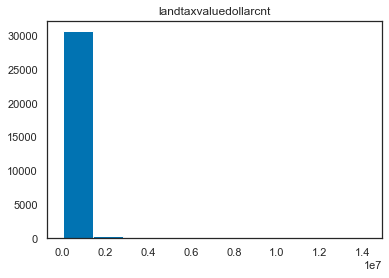

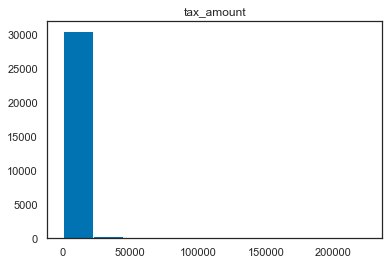

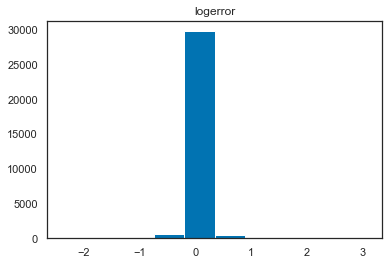

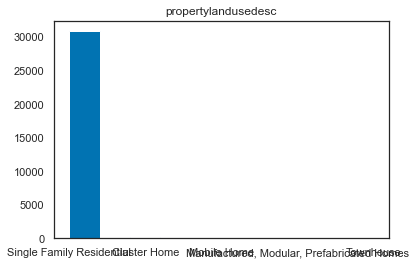

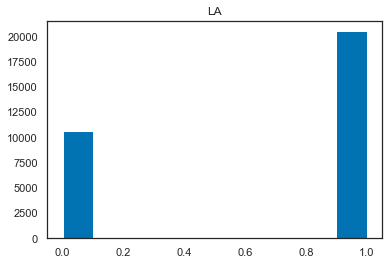

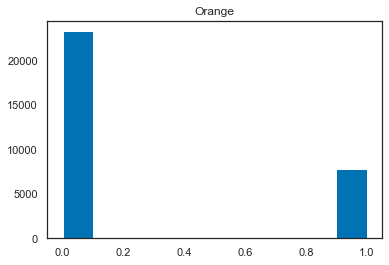

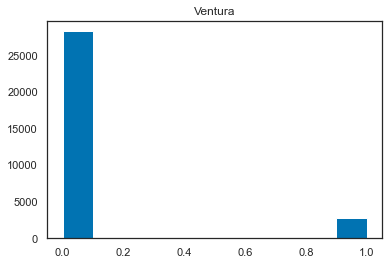

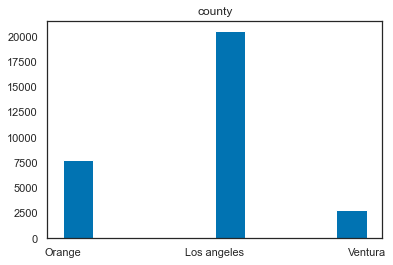

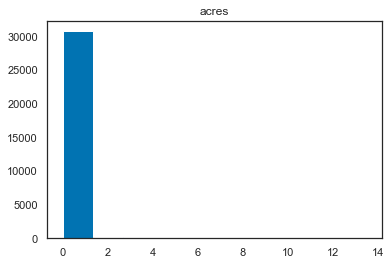

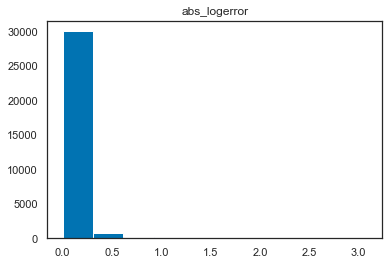

In [6]:
distros(train)

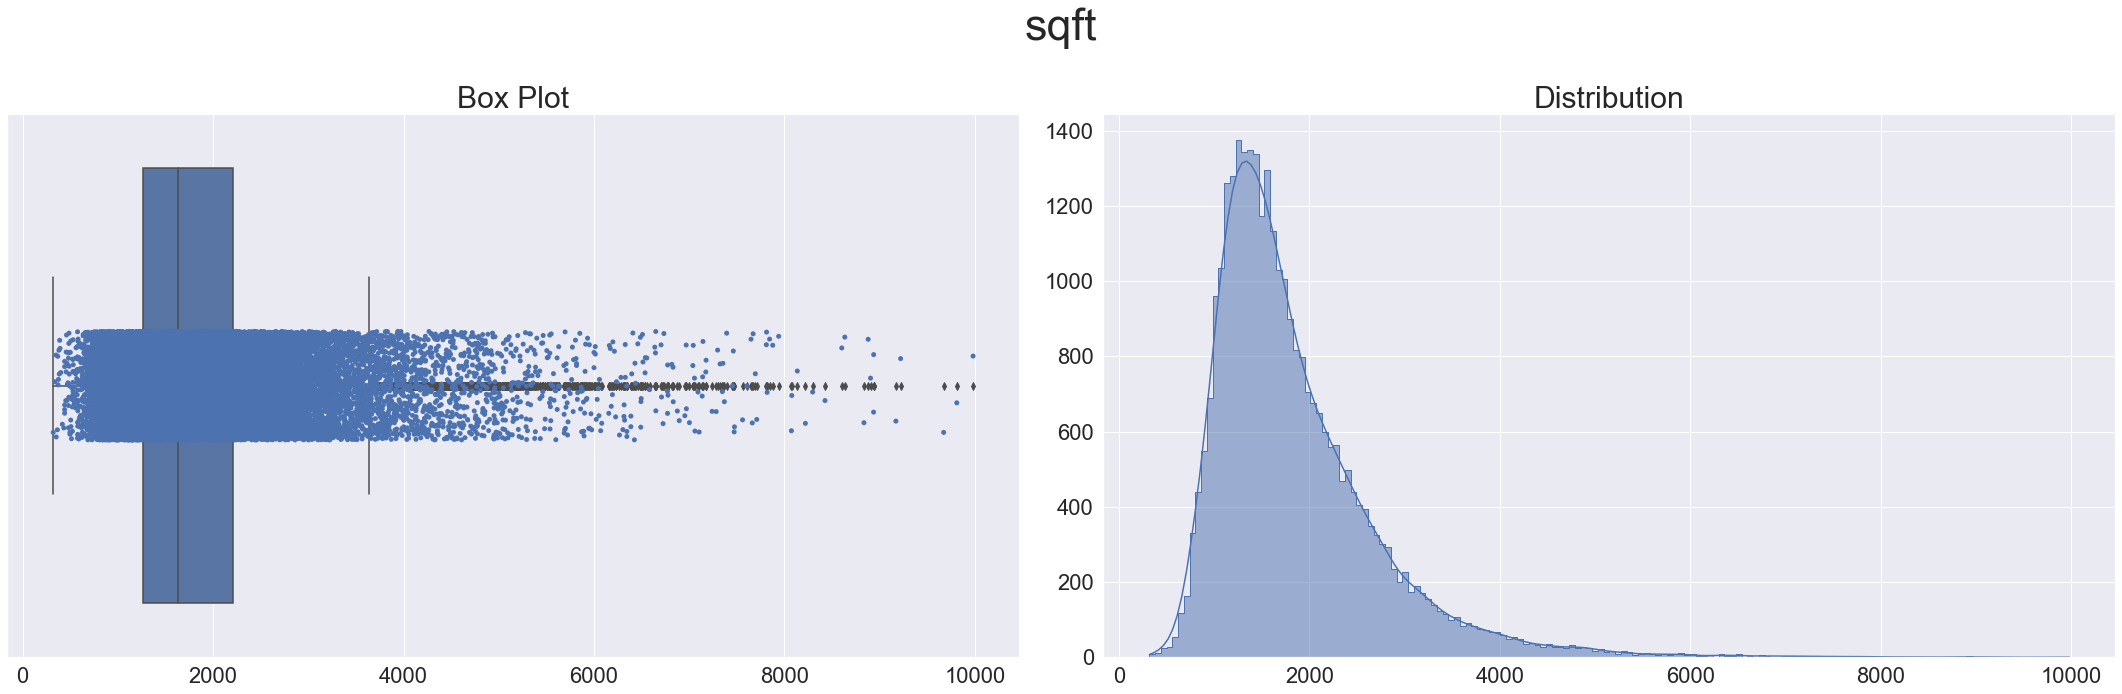

Summary Statistics for sqft
count    31087.000000
mean      1850.183421
std        878.225046
min        320.000000
25%       1260.000000
50%       1626.000000
75%       2210.000000
max       9981.000000
Name: sqft, dtype: float64


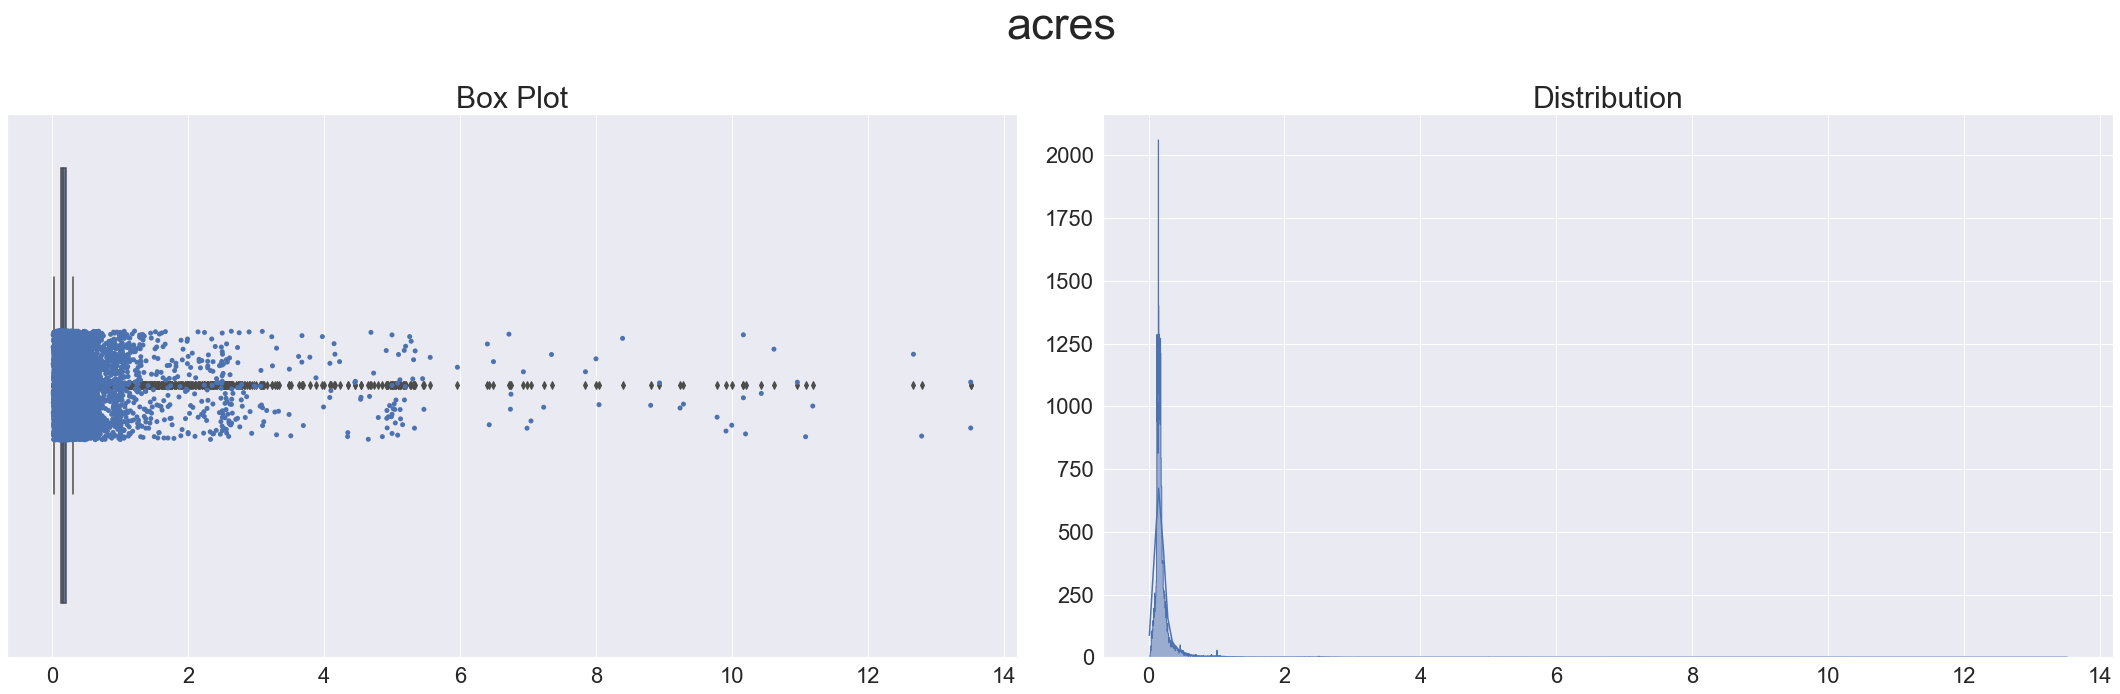

Summary Statistics for acres
count    31087.000000
mean         0.222644
std          0.429521
min          0.011478
25%          0.129706
50%          0.155487
75%          0.196798
max         13.515565
Name: acres, dtype: float64


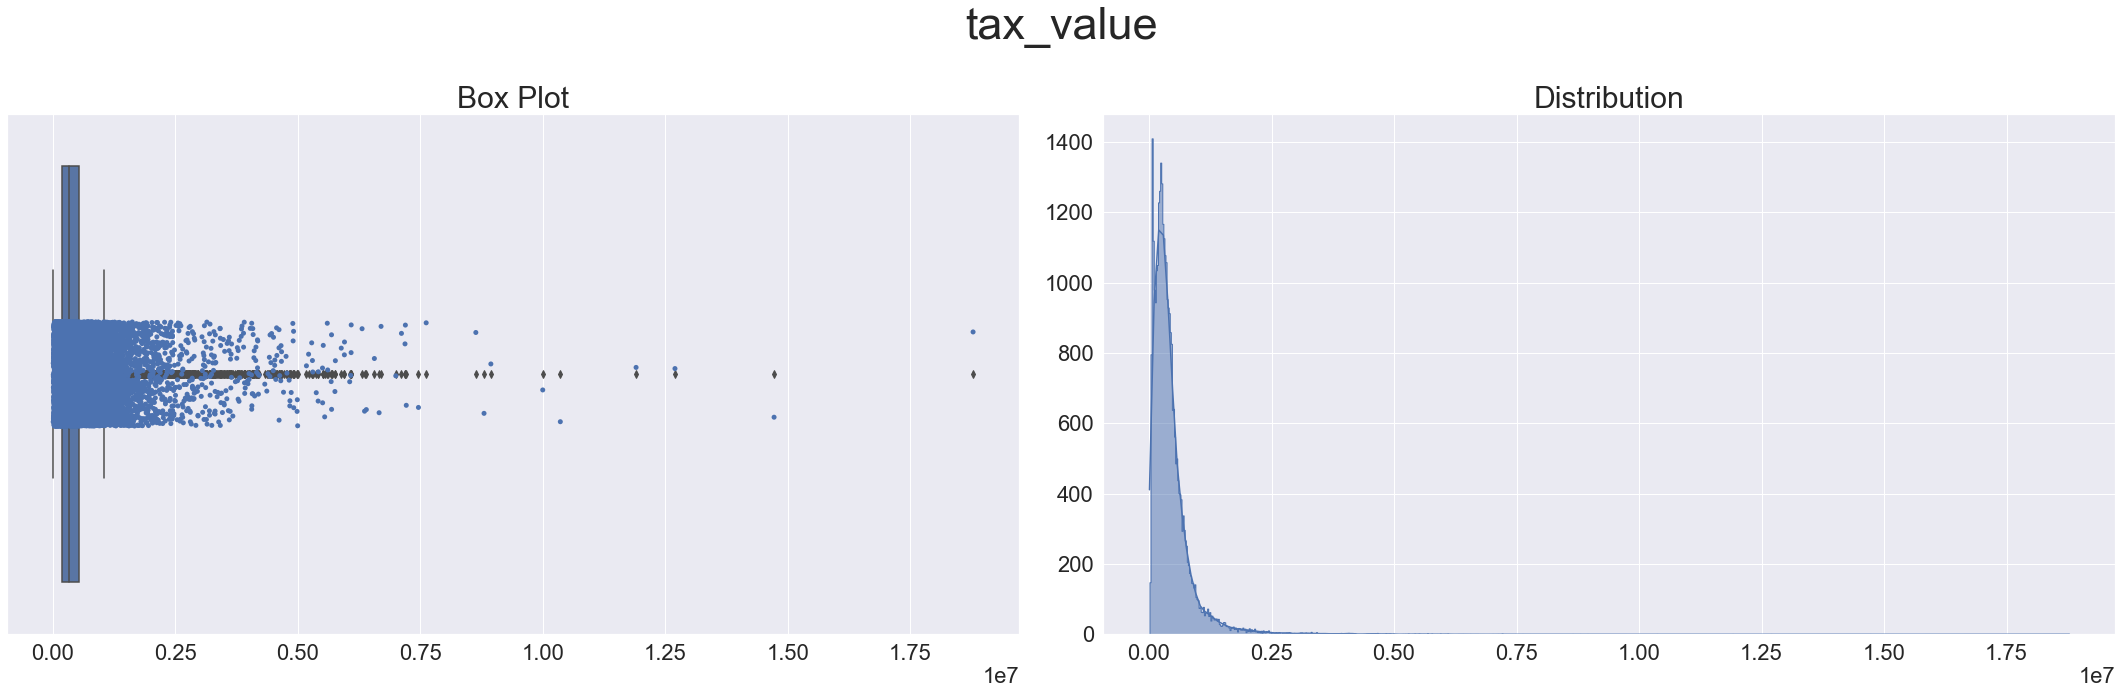

Summary Statistics for tax_value
count    3.108700e+04
mean     4.452008e+05
std      5.209834e+05
min      9.762000e+03
25%      1.888220e+05
50%      3.280000e+05
75%      5.312305e+05
max      1.878212e+07
Name: tax_value, dtype: float64


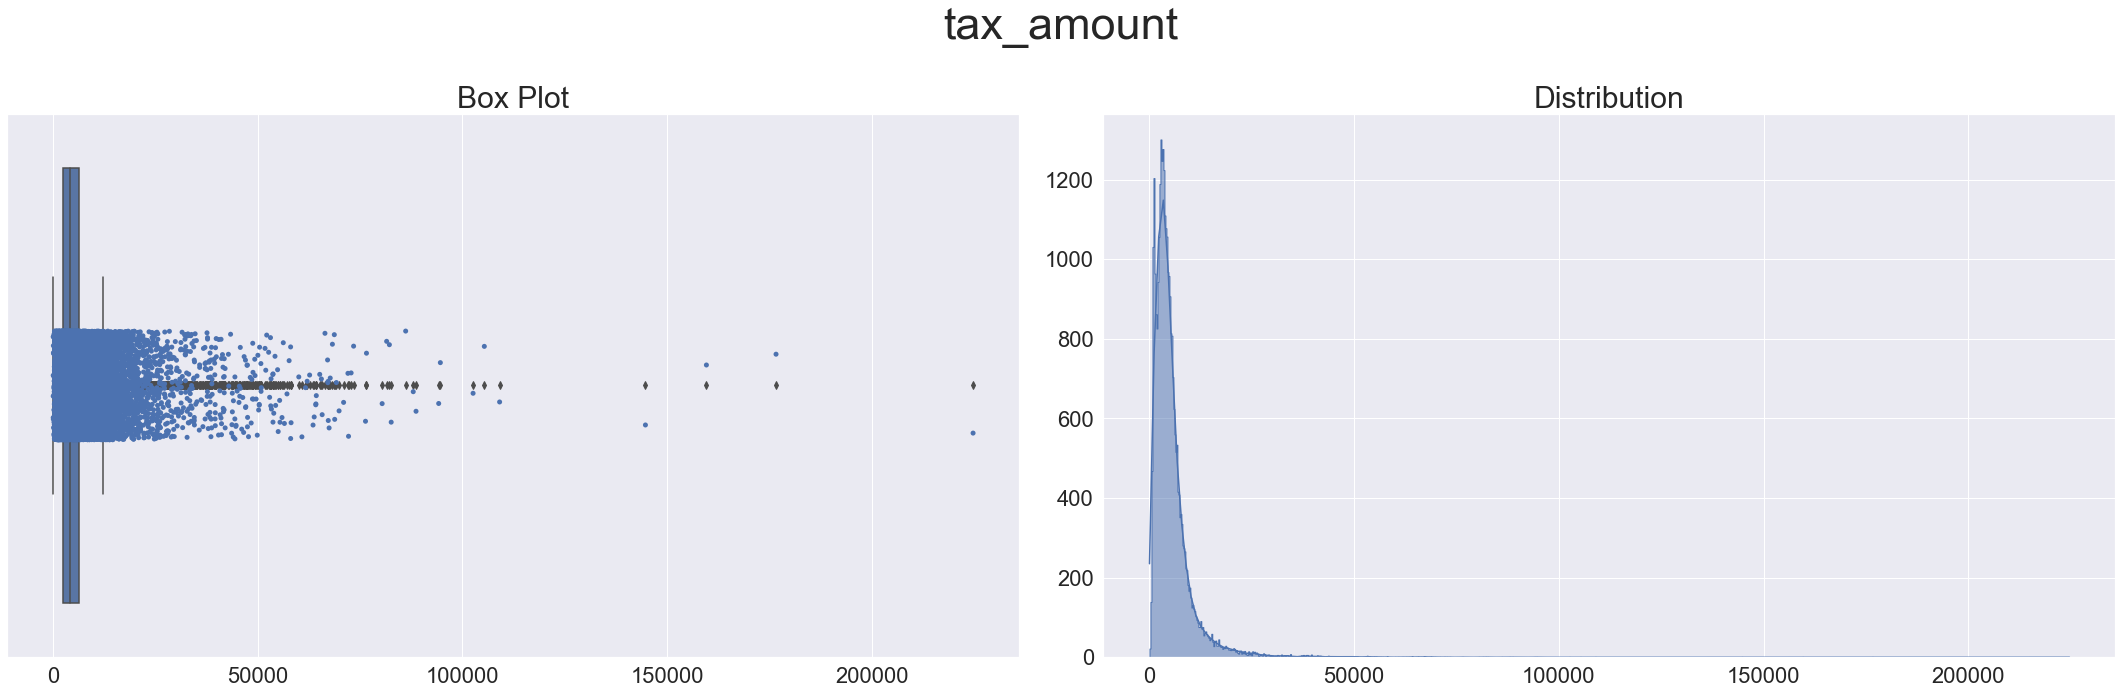

Summary Statistics for tax_amount
count     31087.000000
mean       5431.020780
std        6009.583231
min          49.180000
25%        2537.230000
50%        4095.050000
75%        6363.710000
max      224696.170000
Name: tax_amount, dtype: float64


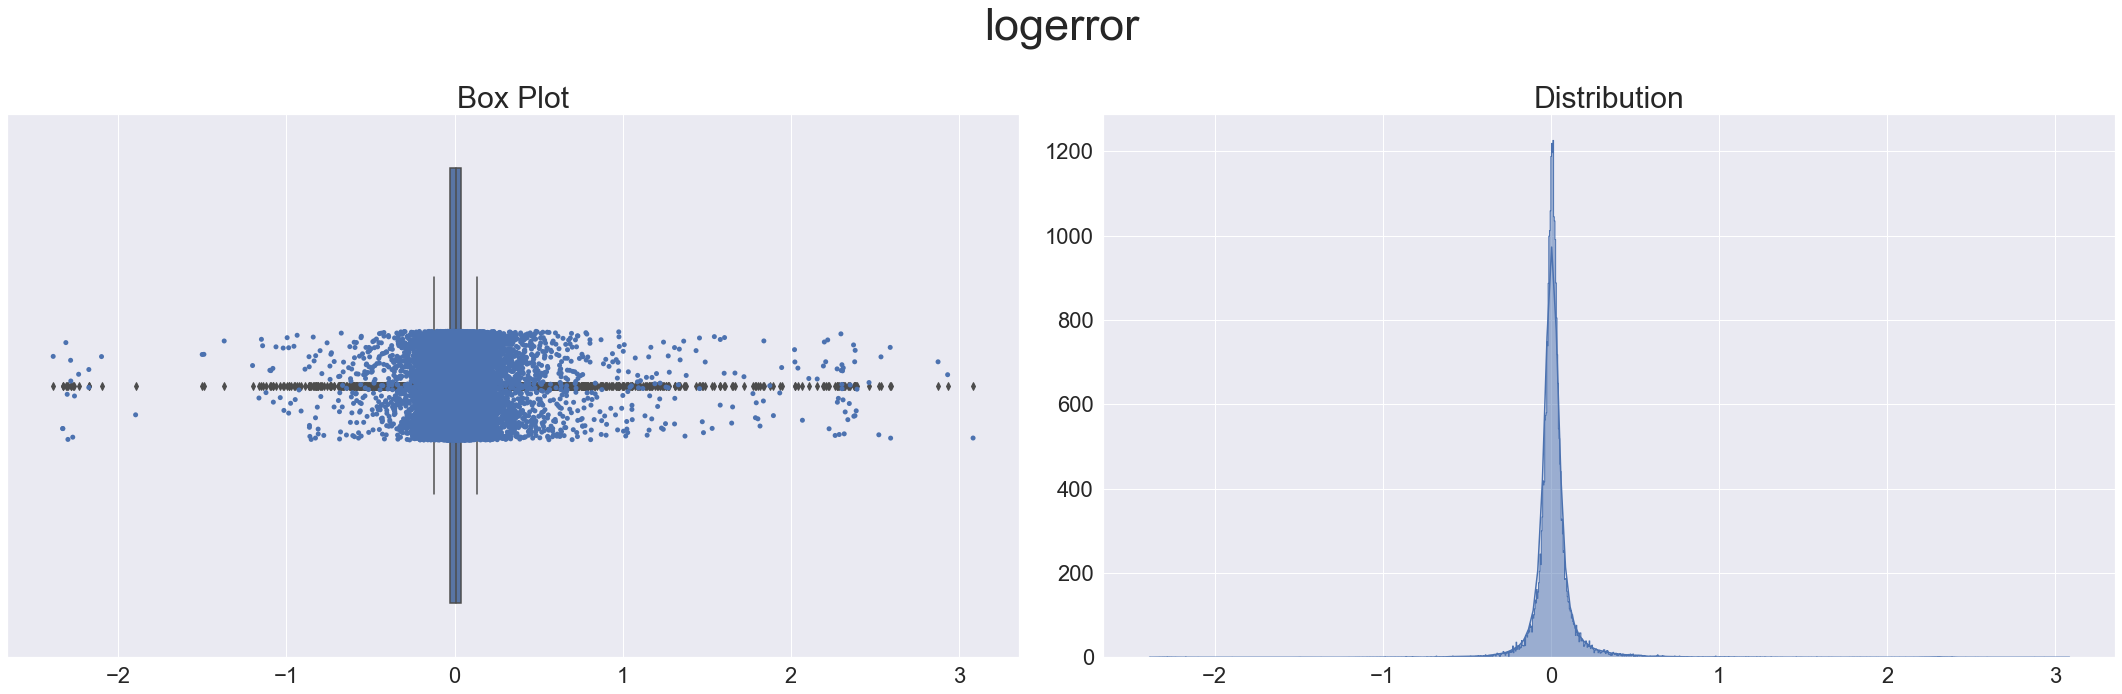

Summary Statistics for logerror
count    31087.000000
mean         0.017357
std          0.167998
min         -2.387800
25%         -0.024453
50%          0.006634
75%          0.039438
max          3.084717
Name: logerror, dtype: float64


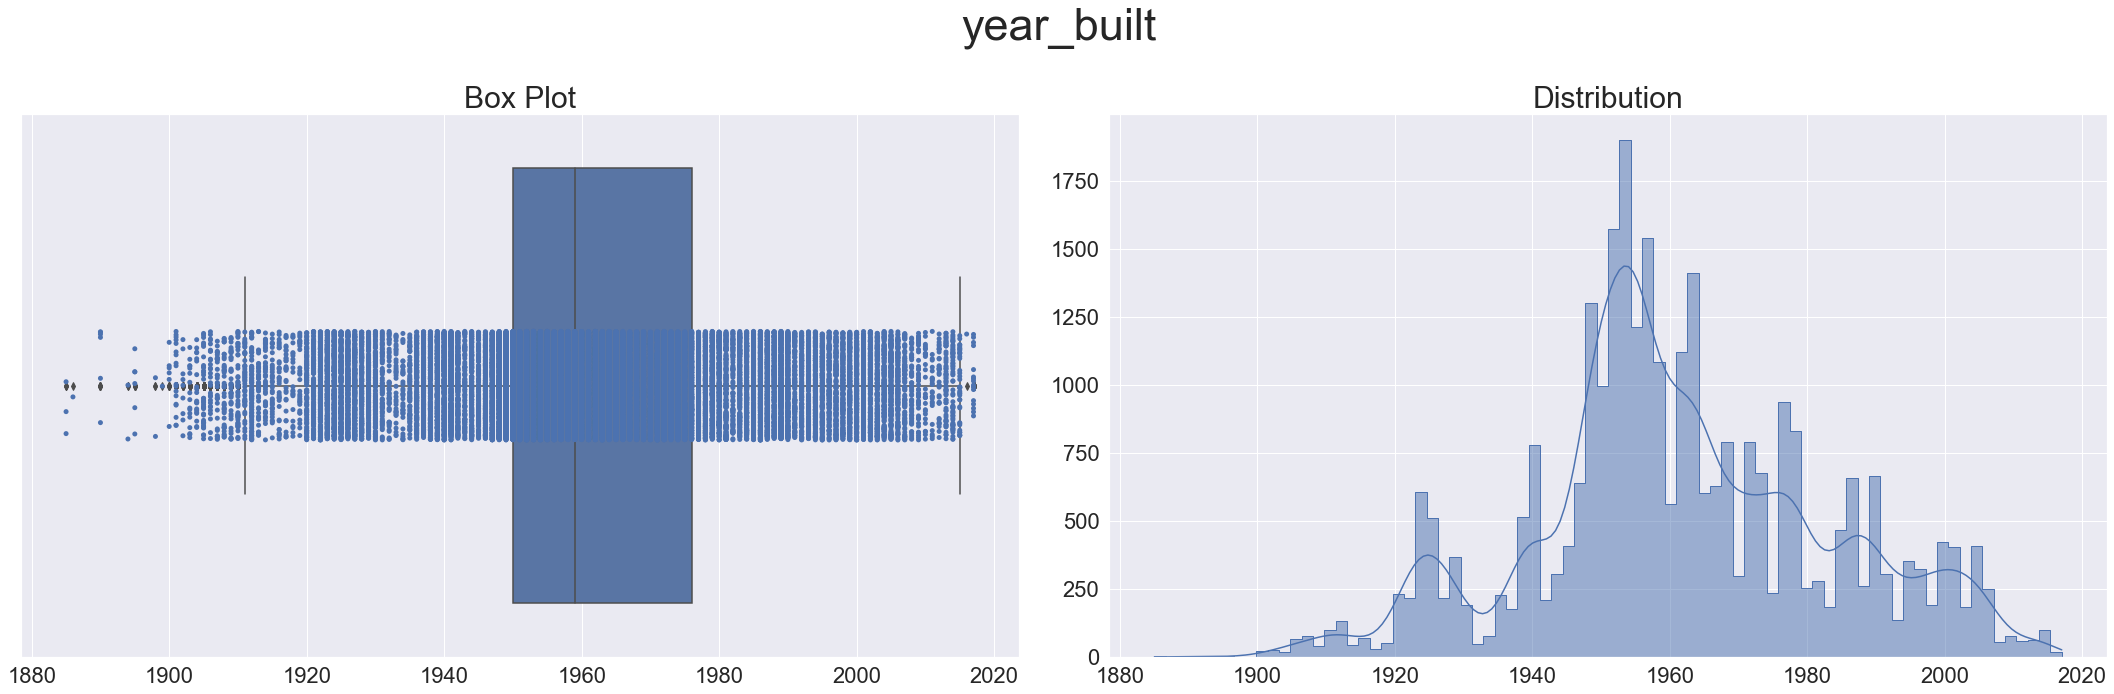

Summary Statistics for year_built
count    31087.000000
mean      1961.291472
std         21.816023
min       1885.000000
25%       1950.000000
50%       1959.000000
75%       1976.000000
max       2017.000000
Name: year_built, dtype: float64


In [7]:
univariate_stuff = ['sqft','acres','tax_value','tax_amount','logerror', 'year_built']

for i in univariate_stuff:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

*Key take aways* 

- i have agressivley cut houses worth over a million dollars
- with the cuts log error is pretty normally distributed with some extreme outliers
- acres is right skewed perhaps lotsize has a factor in logerror

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x1080 with 0 Axes>

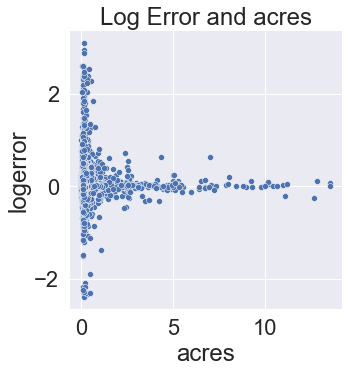

In [8]:
plt.figure(figsize=(10,15))
sns.relplot(train.acres, train.logerror)
plt.title('Log Error and acres')

plt.show()


In [9]:

def logerror_uni(df, variable):
    '''
    explore_univariate will take in a dataframe, and one feature or variable. It graphs a box plot and a distribution 
    of the single variable.
    '''
    #set figure size, font for axis ticks
    plt.figure(figsize=(30,10))
    sns.set(font_scale = 2)
    
    # boxplot and stipplot
    plt.figure(figsize=(10,15))
    sns.relplot(variable, df.logerror, data =df)
    plt.title(f'Log Error and {variable}')

    plt.show()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x720 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

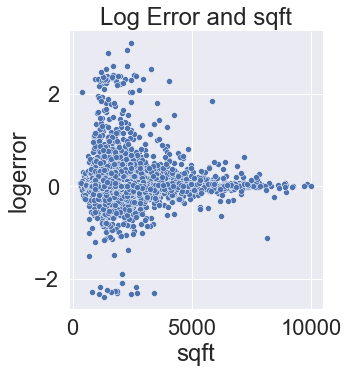

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x720 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

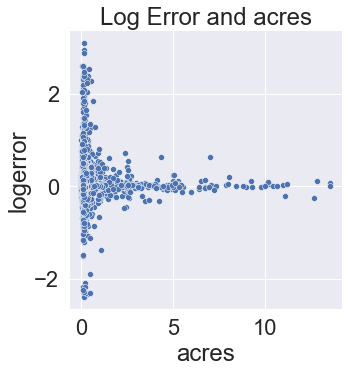

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x720 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

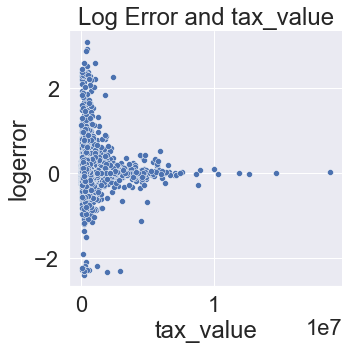

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x720 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

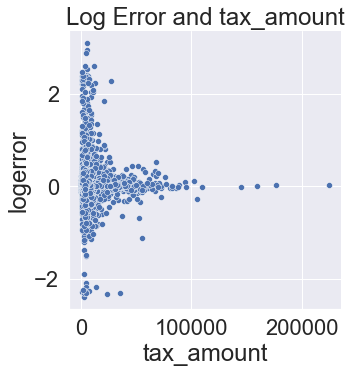

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x720 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

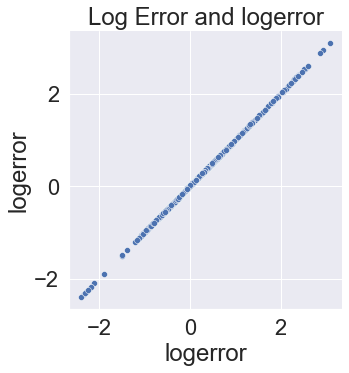

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x720 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

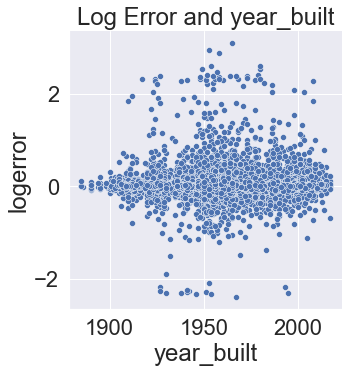

In [10]:
for i in univariate_stuff:
    logerror_uni(train, i,)

In [11]:
def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    '''Takes in df and scales the columns inputed and concats them to the dataframe '''    
    # new column names
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    
    # Fit the scaler on the train
    scaler.fit(train[columns_to_scale])
    
    # transform train validate and test
    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    
    
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

In [12]:
train, validate, test = add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.MinMaxScaler(),
    columns_to_scale=['sqft',
                      'beds',
                      'baths',
                      'year_built',
                      'latitude',
                      'longitude',
                      'acres'])

In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = w.xysplit(train,validate,test,'abs_logerror')

Text(0.5, 1.0, 'Change in inertia as k increases')

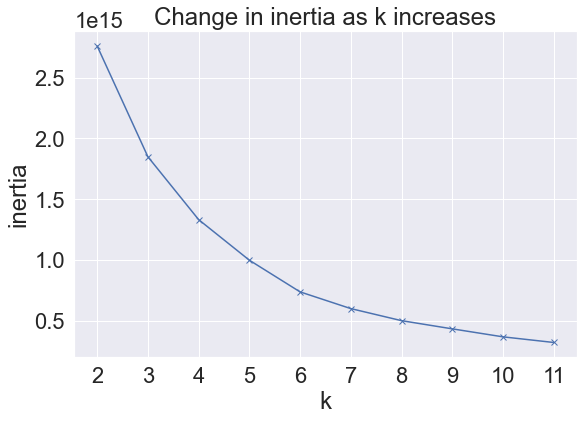

In [64]:
# which k to choose? use a graph to utilize the elbow method

X = train[['longitude', 'latitude']]
plt.figure(figsize=(9, 6))
pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

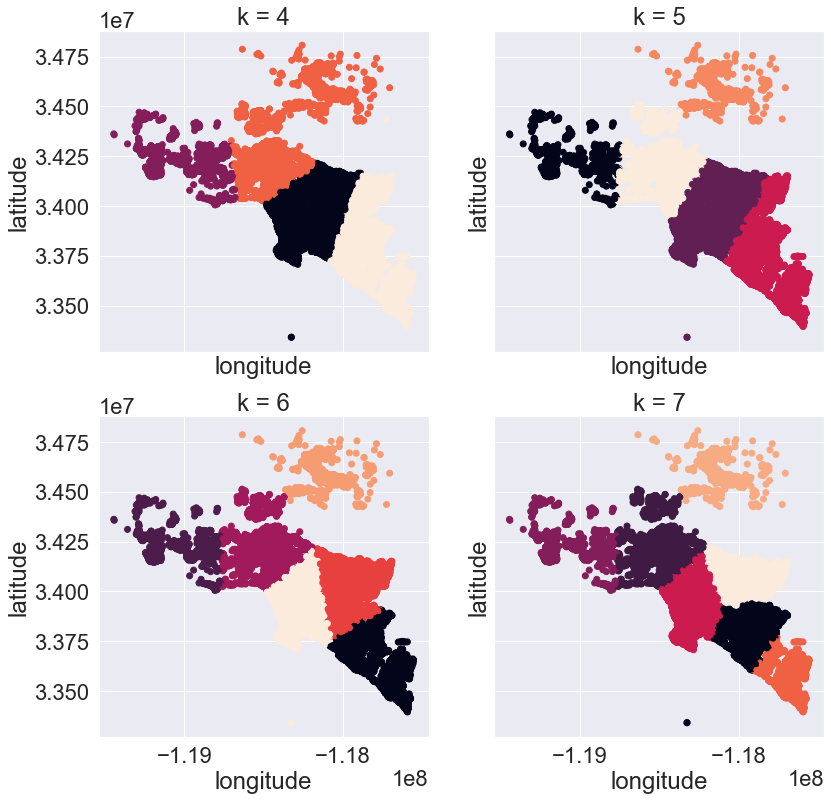

In [15]:
# visualize k for tax rate and home age
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(4, 8)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.longitude, X.latitude, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='longitude', ylabel='latitude')

In [16]:
def create_cluster(train, X, k, cluster_name):
    ''' Takes in df, X (dataframe with variables you want to cluster on), k number of clusters,
    and the name you want to name the column (enter column as string)
    It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    the scaler and kmeans object and unscaled centroids as a dataframe
    note: train_scaled enter the scaled train dataframe
    for X enter the dataframe of the two features for your cluster
    for k enter number of features
    for cluster_name enter name of the cluster column name you want as a string
    '''
    scaler = MinMaxScaler(copy=True).fit(X)
    X = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    kmeans.predict(X)
    train[cluster_name] = kmeans.predict(X)
    # train_scaled[cluster_name] = 'cluster_' + train_scaled[cluster_name].astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
    return train, X, scaler, kmeans, centroids

In [17]:
# k=4 makes the most sense here

# name the cluster column
cluster_name = 'lat_long_cluster'
# make four clusters
k = 6


# create a cluster column
X = train[['longitude', 'latitude']]
train, X, scaler, kmeans, centroids = create_cluster(train, X, k, cluster_name)


# create the same clusters for validate
X = validate[['longitude', 'latitude']]
validate, X, scaler, kmeans, centroids = create_cluster(validate, X, k, cluster_name)


# create the same clusters for validate
X = test[['longitude', 'latitude']]
test, X, scaler, kmeans, centroids = create_cluster(test, X, k, cluster_name)

train.shape, validate.shape, test.shape

((31087, 28), (13323, 28), (11103, 28))

In [18]:
train.head()

,parcelid,baths,beds,sqft,latitude,longitude,lotsizesquarefeet,year_built,structuretaxvaluedollarcnt,tax_value,...,acres,abs_logerror,sqft_scaled,beds_scaled,baths_scaled,year_built_scaled,latitude_scaled,longitude_scaled,acres_scaled,lat_long_cluster
11200,14053141,2.0,3.0,1233.0,33676001.0,-117972048.0,8100.0,1963.0,69956.0,600398.0,...,0.185950,0.062487,0.094504,0.333333,0.166667,0.590909,0.228579,0.779749,0.012920,1
76680,10955509,3.0,3.0,2491.0,34207570.0,-118335174.0,5844.0,1950.0,216086.0,481979.0,...,0.134160,0.034759,0.224718,0.333333,0.333333,0.492424,0.591164,0.587545,0.009085,5
68237,12712515,6.0,5.0,4511.0,33757572.0,-118388141.0,18574.0,2000.0,816634.0,1528126.0,...,0.426400,0.033410,0.433806,0.666667,0.833333,0.871212,0.284219,0.559509,0.030726,0
70891,14079504,3.5,4.0,2789.0,33720464.0,-118055859.0,7100.0,1968.0,224957.0,1138000.0,...,0.162994,0.140273,0.255564,0.500000,0.416667,0.628788,0.258907,0.735387,0.011220,1
12774,14482736,4.5,5.0,3515.0,33622320.0,-117567050.0,6848.0,1995.0,528631.0,880662.0,...,0.157208,0.012415,0.330711,0.666667,0.583333,0.833333,0.191963,0.994116,0.010792,1


<AxesSubplot:>

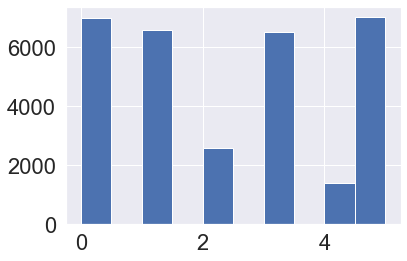

In [27]:
train.lat_long_cluster.hist()

Not normal distro will have to use a non-peramtric test


${H_0}$ = The mean absolute logerror for each lat/long clusters is the same. 

${H_a}$ = The mean absolute logerror for each lat/long cluster is different.

In [35]:
stats.levene(
    train.query('lat_long_cluster == 0').abs_logerror,
    train.query('lat_long_cluster == 1').abs_logerror,
    train.query('lat_long_cluster == 2').abs_logerror,
    train.query('lat_long_cluster == 3').abs_logerror,
    train.query('lat_long_cluster == 4').abs_logerror,
    train.query('lat_long_cluster == 5').abs_logerror
)

LeveneResult(statistic=1.473158866342186, pvalue=0.19486039062788885)

They p value is greater than our alpha so they are of equal variance

In [38]:
stats.kruskal(    train.query('lat_long_cluster == 0').abs_logerror,
    train.query('lat_long_cluster == 1').abs_logerror,
    train.query('lat_long_cluster == 2').abs_logerror,
    train.query('lat_long_cluster == 3').abs_logerror,
    train.query('lat_long_cluster == 4').abs_logerror,
    train.query('lat_long_cluster == 5').abs_logerror)

KruskalResult(statistic=4.938314144837459, pvalue=0.42345476182258057)

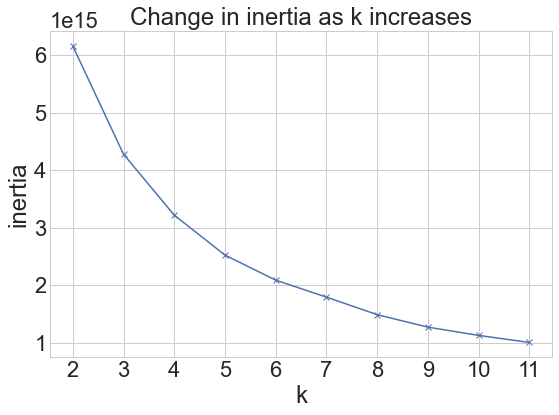

In [45]:
X = train[['latitude','tax_value']]
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

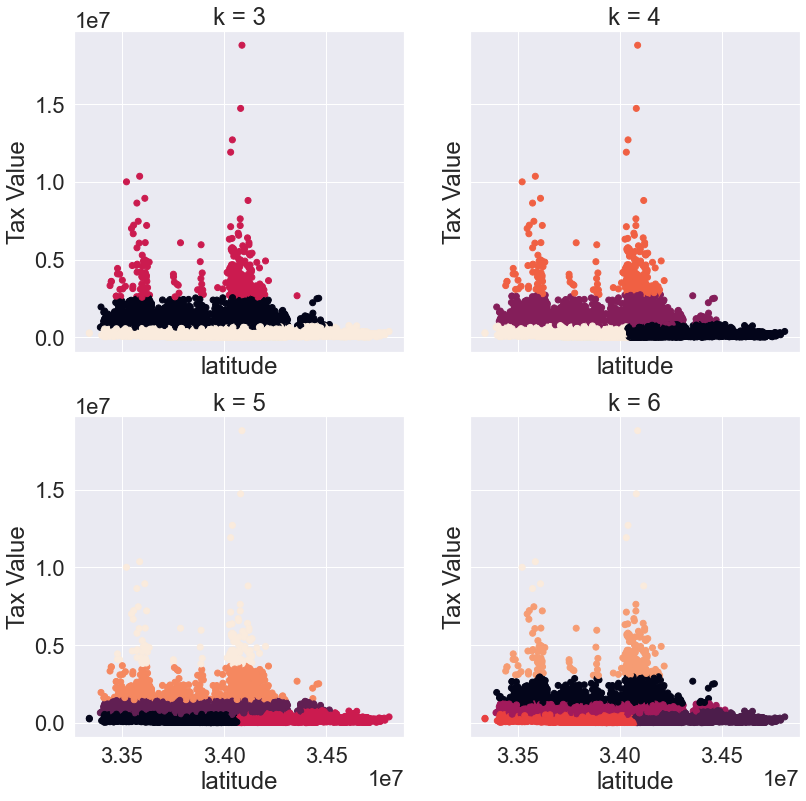

In [48]:
# visualize k for tax rate and home age
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.latitude, X.tax_value, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='latitude', ylabel='Tax Value')

In [49]:
# k=5 makes the most sense here

# name the cluster column
cluster_name = 'lat_value_cluster'
# make four clusters
k = 5


# create a cluster column
X = train[['latitude','tax_value']]
train, X, scaler, kmeans, centroids = create_cluster(train, X, k, cluster_name)


# create the same clusters for validate
X = validate[['latitude','tax_value']]
validate, X, scaler, kmeans, centroids = create_cluster(validate, X, k, cluster_name)


# create the same clusters for validate
X = test[['latitude','tax_value']]
test, X, scaler, kmeans, centroids = create_cluster(test, X, k, cluster_name)

train.shape, validate.shape, test.shape

((31087, 29), (13323, 29), (11103, 29))

<AxesSubplot:>

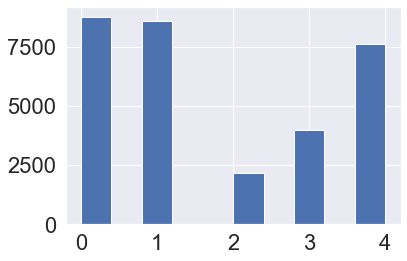

In [50]:
train.lat_value_cluster.hist()

In [52]:
stats.levene(
    train.query('lat_value_cluster == 0').abs_logerror,
    train.query('lat_value_cluster == 1').abs_logerror,
    train.query('lat_value_cluster == 2').abs_logerror,
    train.query('lat_value_cluster == 3').abs_logerror,
    train.query('lat_value_cluster == 4').abs_logerror
)

LeveneResult(statistic=0.8292473082246054, pvalue=0.5062560706616641)


${H_0}$ = The mean absolute logerror for each lat/value clusters is the same. 

${H_a}$ = The mean absolute logerror for each lat/value cluster is different.

In [59]:
stats.kruskal(
    train.query('lat_value_cluster == 0').abs_logerror,
    train.query('lat_value_cluster == 1').abs_logerror,
    train.query('lat_value_cluster == 2').abs_logerror,
    train.query('lat_value_cluster == 3').abs_logerror,
    train.query('lat_value_cluster == 4').abs_logerror)

KruskalResult(statistic=6.252160683211256, pvalue=0.1810915716172331)

In [55]:
def plot_clusters(x ,y, cluster_col_name, df , kmeans, scaler, centroids):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    # set palette to zillow colors
    zpalette = ['#1277e1', '#f3ad35', '#0b449c', '#5289e4', '#c3eafb']

    # set figsize
    plt.figure(figsize=(10, 6))
    
    # scatterplot the clusters 
    sns.scatterplot(x = x, y = y, data = df, hue = cluster_col_name, cmap = zpalette)
    
    # plot the centroids as Xs
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.60, s=500, c='black', marker = 'x')

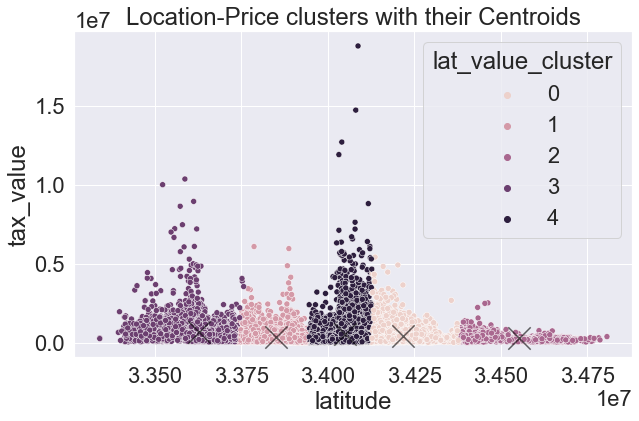

In [61]:
plot_clusters('latitude', 'tax_value', 'lat_value_cluster', train, kmeans, scaler, centroids)

plt.title("Location-Price clusters with their Centroids")
plt.show()

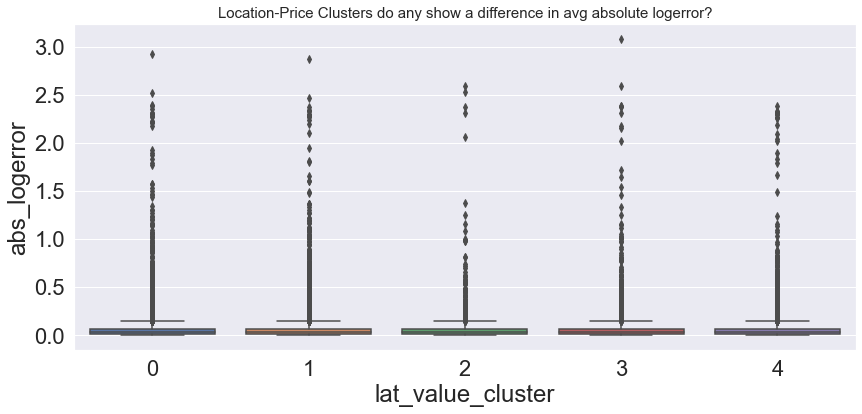

In [62]:
plt.figure(figsize = (14,6))
sns.boxplot(y = train['abs_logerror'], x = train.lat_value_cluster)

plt.title("Location-Price Clusters do any show a difference in avg absolute logerror?", fontsize = 15)
plt.show()